In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:


df = pd.read_csv("Salary Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.duplicated().sum()

0

Text(0, 0.5, 'Salary')

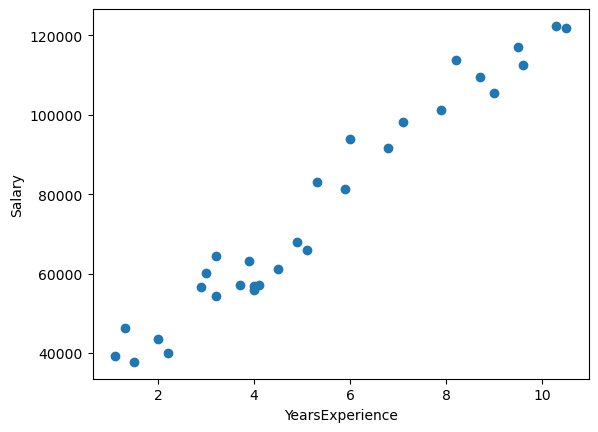

In [ ]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

conl:- we can see that data is in liner faction so we use liner regartion for this


In [ ]:
# diving df into independent and dependent featrue
X=df[['YearsExperience']]  #covert into 2D arrry 
y=df['Salary']   # covert into list/ serial data


In [ ]:
X.head(5)

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
y.head(5)

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=10)

In [ ]:
X_train.shape, X_test.shape

((24, 1), (6, 1))

In [ ]:
y_train.shape, y_test.shape

((24,), (6,))

coln: we divied our data into train and split 
24 data point in -> train
6 data point in --> test

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

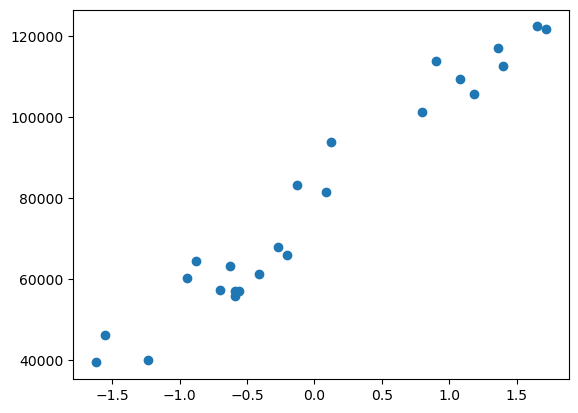

In [ ]:
plt.scatter(X_train,y_train)

#coln: tou can see your graph scaler is descrease(-1.5 t0 +1.5)
previewsly it is (0 to 10)


In [ ]:
## Model Training
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()

In [ ]:
## Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

79072.33333333331

In [ ]:
regressor.coef_

array([26286.53040375])

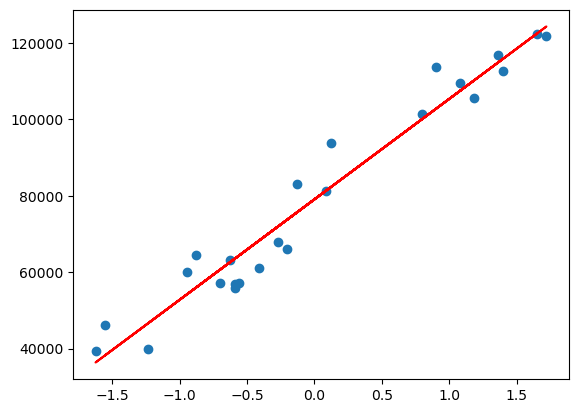

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), 'r')

In [ ]:
#we predict the x_test data values 
y_predict = regressor.predict(X_test)
y_predict

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

In [ ]:
#actual values for that x_test data point , we can see some small diff in ans 
y_test

20    91738.0
7     54445.0
5     56642.0
2     37731.0
3     43525.0
21    98273.0
Name: Salary, dtype: float64

In [ ]:
#for new datapoint prediction :-
#1) convert that new point into scaler range
#2) then u can predict on thay scaler range value of that nre point

#for any new data point to train
scaler.transform([[1.8]])

array([[-1.37488222]])

In [ ]:
# new predic point should be in range of scaler model
a = regressor.predict([[-1.37488222]])
print(a)

[42931.45005573]


## Performance Metrics MAE,MSE,RMSE

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test, y_predict)
mae=mean_absolute_error(y_test, y_predict)
rms=np.square(mse)
print("mean_squared_error (MSE)= ",mse)
print("mean_absolute_error (MAE=)",mae)
print("root_mean_squared_error (RMSE)= ",rms)

mean_squared_error (MSE)=  9785570.138914358
mean_absolute_error (MAE=) 2741.2806275420858
root_mean_squared_error (RMSE)=  95757382943612.36


## Accuracy of the model R squared and Adjusted r ssquared
## R square 
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [ ]:
#our model is 98% Accurate using- R square method

from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)
score

0.9816423482070252

## Adjusted r square 
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [ ]:
#display adjusted R-squared
# using  Adjusted r square  - accuracy is 0.97%
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9770529352587816

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

while saving model:-
model --> serialising --> save into a file.pkl in wb mode.

while reading the model:-
file.pkl in rb mode --> de-serialising --> we get ready model.

In [ ]:
pip install scikit-learn

#model dave
#pickle.dump(model name , filename )
#after runing this block u cab see , thos files are add 

pickle.dump(scaler, open("scaler_file.pkl","wb"))
pickle.dump(regressor, open("regressor_file.pkl","wb"))

In [ ]:
#extarcting that model from .pkl file and use it.
#u can see without any train , EDS,FA , we dirctly able to use this model

model_regressor=pickle.load(open('regressor_file.pkl','rb'))
model_regressor.predict(X_test)

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

In [ ]:
y_test

20    91738.0
7     54445.0
5     56642.0
2     37731.0
3     43525.0
21    98273.0
Name: Salary, dtype: float64

In [ ]:
model_scaler =pickle.load(open('scaler_file.pkl', 'rb'))


In [ ]:

experience = float(input("Please Enter the number of year experience= ")) 
scale_ip = model_scaler.transform([[experience]])
salary_predic = model_regressor.predict(scale_ip)
print(("Predicted salary for")+str(experience)+" experience is "+ "%.2f" % salary_predic[0]+" RS")


Please Enter the number of year experience=  1


Predicted salary for1.0 experience is 35445.96 RS


In [3]:
h = round(11.234, 2)
print(h)

11.23
